In [3]:
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter


In [4]:
df = pd.read_csv("post_natal_data.csv")
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


**DATA PREPROCESSING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [6]:
# Convert the values of "Timestamp" column into datetime datatype

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [7]:
# Counting unique values in each age group
df["Age"].value_counts()

40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: Age, dtype: int64

In [8]:
# Convert"Age" into categories
df["Age"] = df["Age"].astype("category")

In [9]:
# Check the amount of null values in the dataset
df.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [10]:
#  Since there are just a few missing values, I'm filtering out to see them 
# so that I can make an informed decision about how to handle them

df[df.isna().any(axis = 1)]

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
260,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
261,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
262,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
263,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No
721,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
722,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
723,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
724,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No
1146,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
1147,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes


In [11]:
# I"ve decided not to drop the rows with missing values because although the missing values are
# insignificant for my analysis, however other items in the affected rows provide 
# valueable insight into my analysis.

# Im replacing all the missing values with "Not interested to say", which is one of the option
# in the "Suicide attempt" column

df.select_dtypes(include=['object']).fillna(value='Not interested to say', inplace=True)

In [12]:
df.iloc[261: 264]

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
261,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
262,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
263,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No


**EXPLORATORY DATA ANALYSIS**

**Percentage of suicide attempt amongst the participants**

In [13]:
pct_suicide_attempt = round(df["Suicide attempt"].value_counts()["Yes"]/len(df), 2)
pct_suicide_attempt

response_suicide = pd.Series({"Attempted Suicide": pct_suicide_attempt,
                    "Did Not Attempt Suicide": 1 - pct_suicide_attempt})
response_suicide

Attempted Suicide          0.31
Did Not Attempt Suicide    0.69
dtype: float64

<AxesSubplot:>

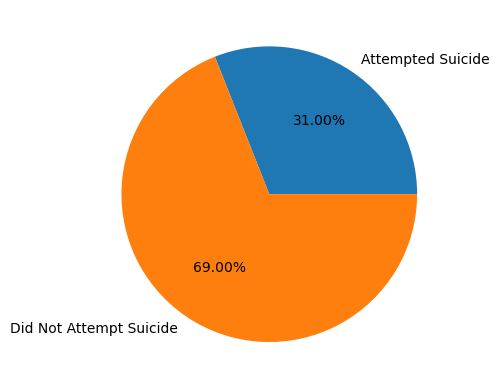

In [14]:
response_suicide.plot.pie(label = "", autopct = "%.2f%%")

**Percentage of suicide attempts by age groups**

In [15]:
# The frequency of suicide attempts by age group

age_suicide_attempt = df.loc[df["Suicide attempt"] == "Yes", "Age" ].value_counts()


# Number of participants in each age group
nums_age = df["Age"].value_counts()

In [16]:
pct_suicide_attempt_age = age_suicide_attempt.divide(nums_age)

<AxesSubplot:title={'center':'Percentage of suicide attempts by age groups'}>

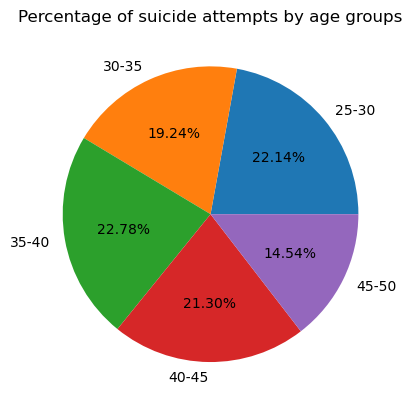

In [17]:
pct_suicide_attempt_age.plot.pie(label = "", title = "Percentage of suicide attempts by age groups", autopct = "%.2f%%")

**Proporton of "Yes" responses to the specific symptoms in each age group**


In [18]:
# Retrive the number of "Yes" by age groups
response_yes = df.groupby("Age")[['Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt']].apply(lambda x: (x == "Yes").sum())   

In [19]:
# Balance the result according to the number of participants in each age group
# to get a more accurate reflect

def divide_cols(x):
    group = x.name
    divisor = nums_age[group]
    return x / divisor  


pct_response_yes = response_yes.groupby("Age").apply(divide_cols)


In [20]:
pct_response_yes.iloc[0:9].applymap(lambda x: "{:.2%}".format(x))

,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
Age,,,,,,,,,
25-30,31.49%,30.39%,39.78%,27.07%,30.94%,57.46%,32.60%,23.20%,33.70%
30-35,35.80%,37.28%,25.15%,22.19%,30.47%,65.98%,19.82%,26.92%,29.29%
35-40,40.69%,38.40%,38.97%,34.10%,25.21%,66.19%,30.09%,26.07%,34.67%
40-45,36.54%,41.76%,24.45%,31.32%,16.76%,62.36%,18.96%,29.67%,32.42%
45-50,30.63%,32.47%,23.25%,28.78%,12.92%,71.96%,15.50%,26.57%,22.14%


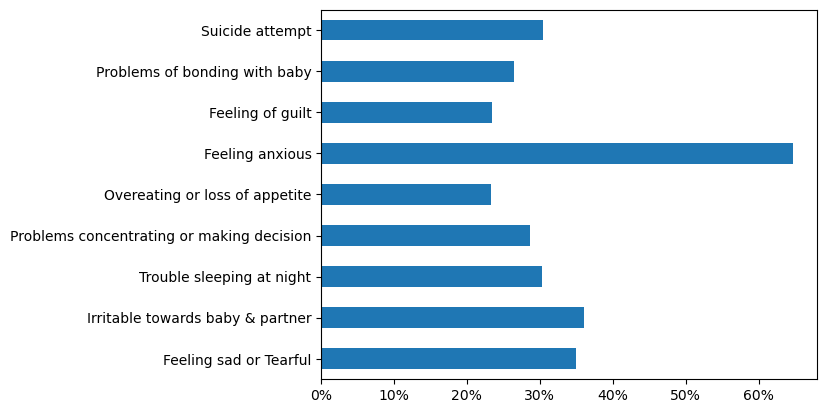

In [21]:
pct_mean = pct_response_yes.mean()*100

ax = pct_mean.plot(kind = "barh")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())